In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train=pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test=pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df=train.append(test)

C:\Users\parveen kumar\AppData\Local\Temp\ipykernel_37644\204322198.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=train.append(test)


In [5]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

MSZoning 0.0014  % missing values
LotFrontage 0.1665  % missing values
Alley 0.9322  % missing values
Utilities 0.0007  % missing values
Exterior1st 0.0003  % missing values
Exterior2nd 0.0003  % missing values
MasVnrType 0.0082  % missing values
MasVnrArea 0.0079  % missing values
BsmtQual 0.0277  % missing values
BsmtCond 0.0281  % missing values
BsmtExposure 0.0281  % missing values
BsmtFinType1 0.0271  % missing values
BsmtFinSF1 0.0003  % missing values
BsmtFinType2 0.0274  % missing values
BsmtFinSF2 0.0003  % missing values
BsmtUnfSF 0.0003  % missing values
TotalBsmtSF 0.0003  % missing values
Electrical 0.0003  % missing values
BsmtFullBath 0.0007  % missing values
BsmtHalfBath 0.0007  % missing values
KitchenQual 0.0003  % missing values
Functional 0.0007  % missing values
FireplaceQu 0.4865  % missing values
GarageType 0.0538  % missing values
GarageYrBlt 0.0545  % missing values
GarageFinish 0.0545  % missing values
GarageCars 0.0003  % missing values
GarageArea 0.0003  % m

In [6]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [7]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [8]:
## Numerical variables are usually of 2 type
## 1st Continous variable and 2nd Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


In [9]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


In [10]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
from sklearn import preprocessing
label= preprocessing.LabelEncoder()

for i in df.columns:
    if df[i].dtypes == object:
        df[i]= label.fit_transform(df[i])

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0


In [13]:
df.isnull().sum().sort_values(ascending=False).head(20)

SalePrice        1459
LotFrontage       486
GarageYrBlt       159
MasVnrArea         23
BsmtFullBath        2
BsmtHalfBath        2
GarageArea          1
TotalBsmtSF         1
BsmtUnfSF           1
BsmtFinSF2          1
BsmtFinSF1          1
GarageCars          1
ScreenPorch         0
Functional          0
GrLivArea           0
SaleCondition       0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
dtype: int64

In [14]:
df_test=df[df['SalePrice'].isnull()]

In [15]:
df_test.drop(['SalePrice'],axis=1 , inplace=True)

C:\Users\parveen kumar\AppData\Local\Temp\ipykernel_37644\362045083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'],axis=1 , inplace=True)


In [16]:
df_train=df[~df['SalePrice'].isnull()]
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)
df_train = df_train.reset_index(drop=True)

In [18]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

In [19]:
X= df_train.iloc[:,:-1]
y= df_train.iloc[:,-1]
data_test= df_test 


In [20]:
y.shape

(1460,)

In [21]:
## Spliting Trainset and testset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =0)

In [22]:
## Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
Lr= LinearRegression()
Lr_fit = Lr.fit(X_train,y_train)
predict = Lr.predict(X_test)

print('prediction:', predict)

prediction: [ 223233.78052849  175213.82377676  103560.69920215  218458.39858315
   93530.43843512   81149.85126571  238747.99169765  141296.65571278
  429589.95827371  160541.66747697  192004.01887315  -59652.98619971
  244987.87786372  107040.14831768  120927.79869569  136425.94232013
  235016.12891029  117523.36554066  129347.68235699  173778.19798618
  141185.94118579  158560.13517721   70359.93412954  151417.56498158
  203868.23757229  192686.00698537  172081.82859399   64935.42855415
  353379.71887819  113425.50193703  140302.57202912  219566.67761263
  146368.64453179  283176.06036171  317740.57774057  188619.97698947
  303813.92731363  110798.32625229  228919.13686236  336693.47183585
  213902.40661202   96613.65870663  200980.27342984  297349.95671178
  334815.75761721  129892.39923168 -134553.52621139  110910.30141647
  176395.83072692   79569.71533936  392638.37705728  146639.4110434
  182440.41135267   65242.18299961  241889.41043169   88229.12912454
  103049.92025923  2277

In [24]:
data_test= sc.transform(data_test)

In [25]:
predict_test = Lr.predict(data_test)

print('prediction:', predict_test)

prediction: [120566.97684259 203726.02879795 173733.50135145 ... 171715.35259337
 128904.25666727 232241.829968  ]


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
gbRegressor = GradientBoostingRegressor()
gb_fit= gbRegressor.fit(X_train, y_train)
gb_pred =(gbRegressor.predict(X_test))
accuracy_gb= r2_score(y_test,gb_pred)
accuracy_gb

0.8596116901482926

In [27]:
gb_pred_test = gbRegressor.predict(data_test)

In [28]:
gb_pred_test

array([121440.13808854, 154757.96902943, 178177.53663038, ...,
       149416.03250029, 119672.98661297, 236362.65233802])

In [39]:
# on which parameter the model has been trained
gbRegressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

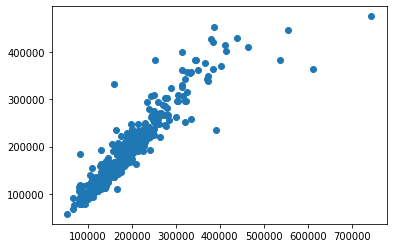

In [42]:
## Plot a scatter plot for the prediction 
plt.scatter (y_test, gb_pred)

In [43]:
## residuals
residuals=y_test-gb_pred
residuals

529     -18468.693754
491     -23202.946828
459       5553.440165
279     -25154.881557
655      -2491.795118
            ...      
271      20476.429633
445     -32419.147016
654     -12679.577159
1280     17590.148192
898     247113.549836
Name: SalePrice, Length: 438, dtype: float64

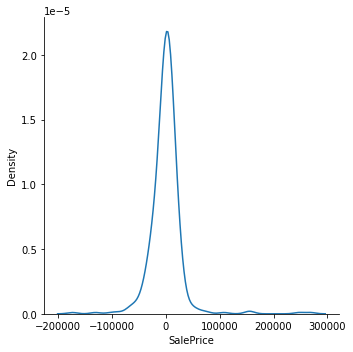

In [45]:
## Plot this residuals
import seaborn as sns
sns.displot(residuals, kind= "kde")

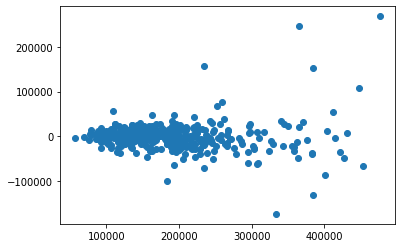

In [46]:
## Scatter plot with respect to prediction and residuals
#uniformly distribute
plt.scatter(gb_pred,residuals)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, gb_pred))
print(mean_absolute_error(y_test, gb_pred))
print(np.sqrt(mean_squared_error(y_test,gb_pred)))

953095033.9945133
17061.84389673409
30872.237269017503


### New Data Prediction

In [31]:
data_test[0].shape

(80,)

In [34]:
data_test[0].reshape(1,-1).shape

(1, 80)

In [38]:
gbRegressor.predict((data_test[1].reshape(1,-1)))

array([154757.96902943])

### Pickling The Model file For Deployment

In [48]:
import pickle

In [49]:
pickle.dump(gbRegressor,open('gb_model.pkl','wb'))

In [51]:
pickle_model= pickle.load(open('gb_model.pkl','rb'))

In [55]:
pickle_model.predict((data_test[0].reshape(1,-1)))

array([121440.13808854])